# Introduction

Amazon is a giant e-commerce that sells almost everything including books. This notebook will predict amazon rating. You can get dataset from kaggle here. https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

# Features

Name: Name of the book

Author: The author of the book.

User Rating: Amazon user rating.

Reviews: Amazon User Rating

Price: The price of the book (As at 13/10/2020).

Year: The Year(s) it ranked on the bestseller.

Genre: Whether fiction or non-fiction.

In [78]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
importlib.reload(sys)

%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("deep")
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data Exploration

In [3]:
# read the data
df = pd.read_csv('D:/dataset/bestsellers with categories.csv', error_bad_lines = False)

# DEA (Data Exploratory Analysis)

In [4]:
# show the first few rows
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
# check basic features and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


The dataset contains both numerical and categorical data types.

In [6]:
# check no. of records
len(df)

550

# Data Cleaning

In [7]:
# check for duplications
df.duplicated().any()

False

In [8]:
# check if there are any missing values
df.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

Let's use heatmap to visualise above result

<AxesSubplot:>

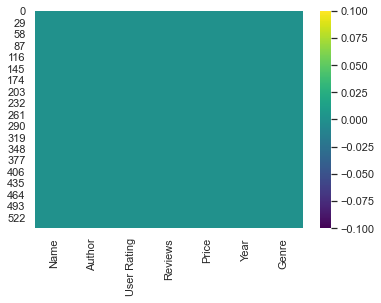

In [9]:
sns.heatmap(df.isnull(), cmap='viridis')

No duplicated or missing values, that makes things a little easier.

# Data Visualization

Text(0, 0.5, 'Frequency')

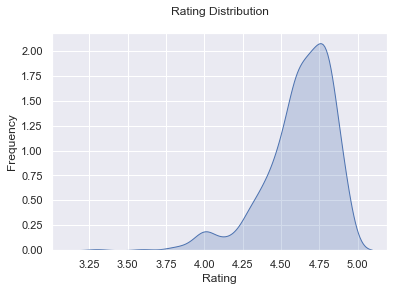

In [10]:
# ratings distribution
sns.kdeplot(df['User Rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

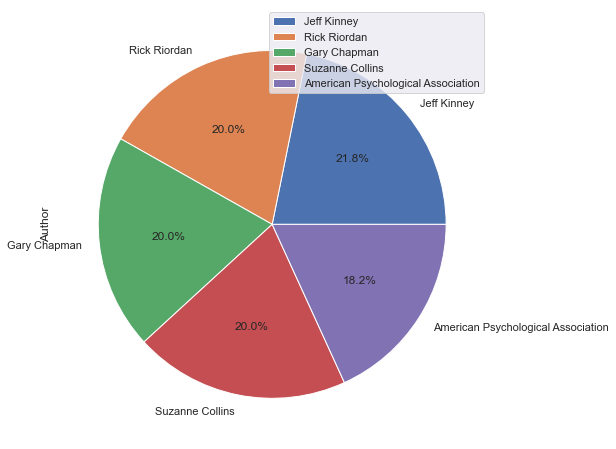

In [11]:
# sns.set_palette("deep")
# top 5 Author
df['Author'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
# plt.axis('equal')

From the top 5 author, the only female author is Suzanne Collins with 20% and the only Association author is American Psychological Assocation with 18.2%. The most populer author among them is Jeff Kinney with 21.8%.

C:\Users\viony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '3.3'),
  Text(1, 0, '3.6'),
  Text(2, 0, '3.8'),
  Text(3, 0, '3.9'),
  Text(4, 0, '4.0'),
  Text(5, 0, '4.1'),
  Text(6, 0, '4.2'),
  Text(7, 0, '4.3'),
  Text(8, 0, '4.4'),
  Text(9, 0, '4.5'),
  Text(10, 0, '4.6'),
  Text(11, 0, '4.7'),
  Text(12, 0, '4.8'),
  Text(13, 0, '4.9')])

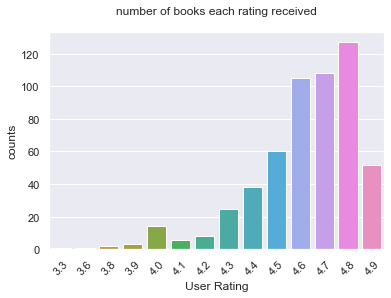

In [15]:
# number of books per rating
# sns.countplot(x = "User_rating", df=f, order=np.arange(start=0, stop=5.5, step=0.5))
sns.barplot(df['User Rating'].value_counts().head(15).index, df['User Rating'].value_counts().head(15))
plt.title('number of books each rating received\n')
plt.xlabel('User Rating')
plt.ylabel('counts')
plt.xticks(rotation=45)

C:\Users\viony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews', ylabel='Name'>

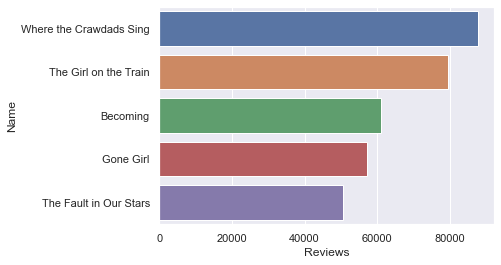

In [17]:
# highest reviewed books
popular_books = df.nlargest(10, ['Reviews']).set_index('Name')['Reviews']
sns.barplot(popular_books, popular_books.index)

C:\Users\viony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Name'>

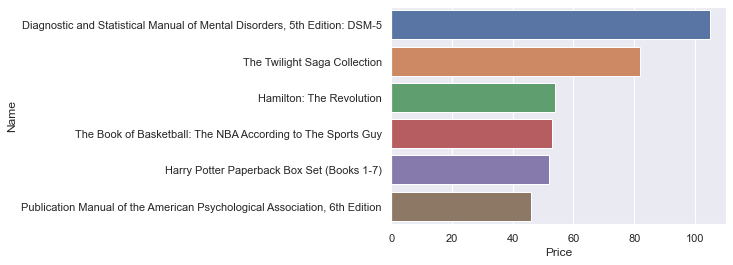

In [21]:
# the most expensive books
expensive_books = df.nlargest(10, ['Price'])
sns.barplot(expensive_books['Price'], expensive_books['Name'])

C:\Users\viony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Total Reviews and Rating')

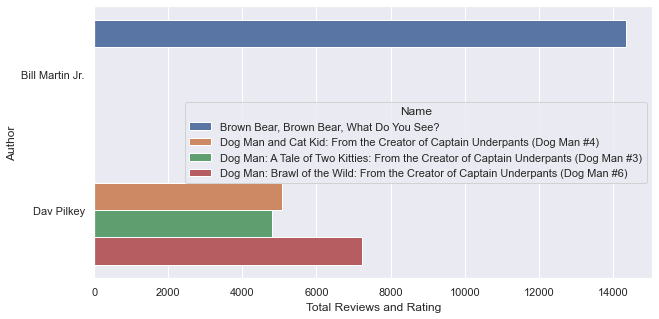

In [37]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
highestratedauthor = df.nlargest(5, ['User Rating']).set_index('Author')
sns.barplot(highestratedauthor['Reviews'], highestratedauthor.index, ci=None, hue=highestratedauthor['Name'])
plt.xlabel("Total Reviews and Rating")

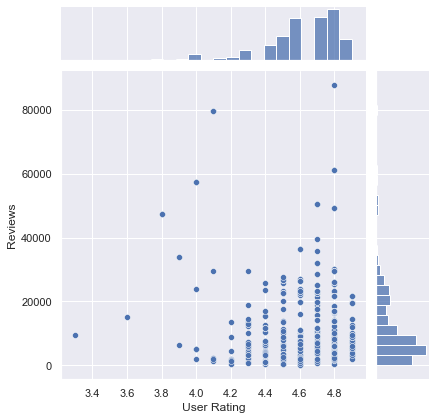

In [38]:
# visualise a bivariate distribution between ratings & reviews
sns.jointplot(x = 'User Rating', y = 'Reviews', data = df)

# Data Preprocessing
Data preprocessing is the conversion of data into machine-readable form can be interpreted, analysed and used by machine learning algorithms. In this analysis we will apply anomaly detection and feature engineering techniques.

1) Anomaly Detection
The main goal of this section is to remove extreme outliers (abnormal distance from other values) from features, this will have a positive impact on the accuracy of the model.

<AxesSubplot:xlabel='User Rating'>

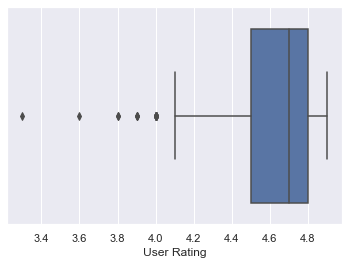

In [40]:
# find no. of reviews outliers
sns.boxplot(x=df['User Rating'])

Above plot shows points between 3.2 to 4.0, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

In [42]:
# remove outliers from User Rating 
df = df.drop(df.index[df['User Rating'] >= 4.0])

<AxesSubplot:xlabel='Reviews'>

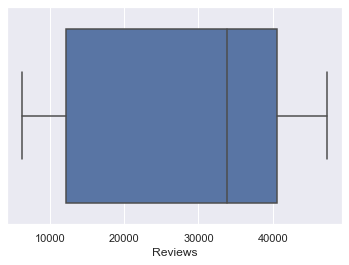

In [43]:
# find Reviews count outliers
sns.boxplot(x=df['Reviews'])

There are no outliers detected in reviews

<AxesSubplot:xlabel='Price'>

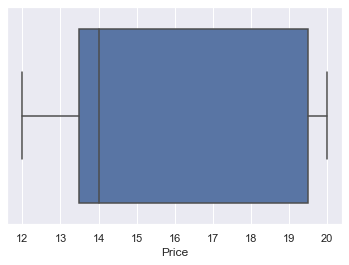

In [44]:
# find Price outliers
sns.boxplot(x=df['Price'])

There are no outliers detected in price

<AxesSubplot:xlabel='Year'>

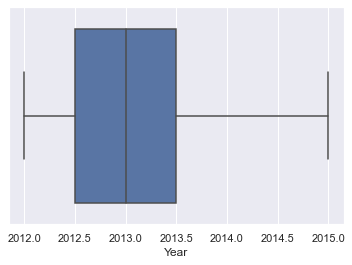

In [45]:
# find Year outliers
sns.boxplot(x=df['Year'])

There are no outliers detected in year

# 2) Feature Engineering¶
Feature engineering is the process of selecting and transforming variables when creating a predictive model. Many machine learning algorithms require that their input is numerical and therefore categorical features such as title, authors and language code must be transformed into numerical features before we can use any of these algorithms.

In [47]:
# encode name column
le = preprocessing.LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])

In [49]:
# encode author column
df['Author'] = le.fit_transform(df['Author'])

In [50]:
# encode genre column
enc_genre = pd.get_dummies(df['Genre'])
df = pd.concat([df, enc_genre], axis = 1)

# Machine Learning Model
The aim of this section is to come up with a model for predicting the book ratings. We'll use linear regression to build a model that predicts book ratings. Linear regression algorithm is a basic predictive analytics technique. There are two kinds of variables in a linear regression model:

The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
The output variable is the variable that we want to predict. It is commonly referred to as Y.

In [71]:
# divide the data into attributes and labels
X = data.drop(['User Rating', 'Price', 'Year', 'Name', 'Author', 'Genre'], axis = 1)
y = data['User Rating']

Attributes are the independent variables whilst labels are dependent variables whose values are to be predicted.

In [72]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

test_size variable is where we actually specify the proportion of the test set. Now to train our algorithm, we need to import LinearRegression class instantiate it, and call the fit() method along with the training data.

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Next step is to use the test data to check accurately our algorithm predicts the percentage score.

In [74]:
predictions = lr.predict(X_test)

Now compare the actual output values for X_test with the predicted values.

In [75]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.2,4.621838
1,4.8,4.621707
2,4.8,4.615637
3,4.7,4.621959
4,4.8,4.625538
5,4.8,4.624470
6,4.5,4.611030
7,4.8,4.609195
8,4.8,4.608683
9,4.6,4.623160


<AxesSubplot:>

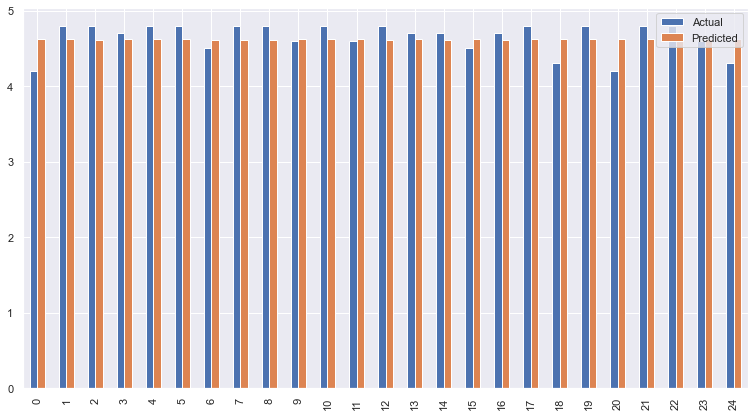

In [76]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

Though the model is not very precise, the predicted percentages are close to the actual ones.

In [77]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.17049259781070786
MSE: 0.05086475249383189
RMSE: 0.22553215401319585
